# V
Visa 

## Settings

In [1]:
# Root Settings
import sys
from pathlib import Path

# Add project root to path
sys.path.append(str(Path().resolve().parent))

# Load basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

# Custom functions using sec-edgar-api and yfinance
from finance import (
    get_facts,
    annual_net_income, plot_annual_net_income, plot_net_income_growth,
    annual_dividends, plot_annual_dividends, plot_dividends_growth,
    historical_price
)

# Style settings
plt.style.use('ggplot')
plt.rc('axes', unicode_minus=False)
plt.rcParams.update({
    'axes.titlesize': 20,       # Plot titles
    'axes.labelsize': 16,       # X/Y axis labels
    'xtick.labelsize': 14,      # X-axis tick labels
    'ytick.labelsize': 16,      # Y-axis tick labels
    'legend.fontsize': 12,      # Legend (if used)
    'figure.titlesize': 22,     # Main figure title (if used)
})

## Company Information

In [2]:
ticker = 'V'
facts = get_facts(ticker=ticker)

## Income

In [3]:
df_net_income = annual_net_income(facts)
df_net_income[0]

,date,net_income,year
0,2007-09-30,-1076000000,2007
1,2008-09-30,804000000,2008
2,2009-09-30,2353000000,2009
3,2010-09-30,2966000000,2010
4,2011-09-30,3650000000,2011
5,2012-09-30,2144000000,2012
6,2013-09-30,4980000000,2013
7,2014-09-30,5438000000,2014
8,2015-09-30,6328000000,2015
9,2016-09-30,5991000000,2016


## Income Growth (%)

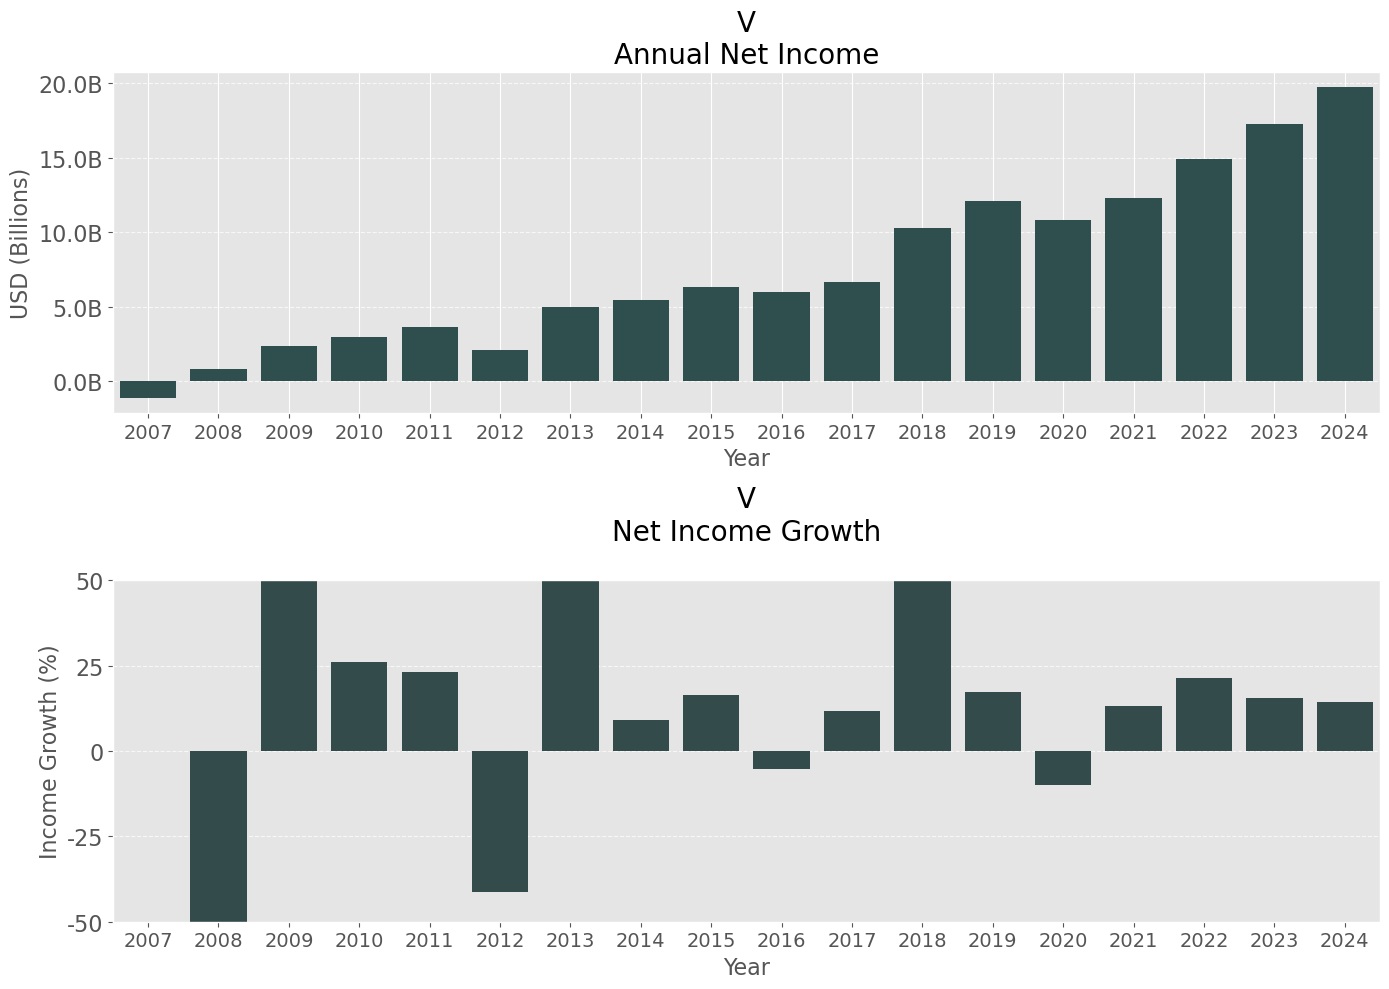

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_net_income(df_net_income[0], ticker=ticker, unit='B', ystep=50e8, ax=axes[0])
plot_net_income_growth(df_net_income[0], ticker=ticker, ymin=-50, ymax=50, ystep=25, ax=axes[1])

# ✅ Show x-ticks on upper graph too
axes[0].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

## Price

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


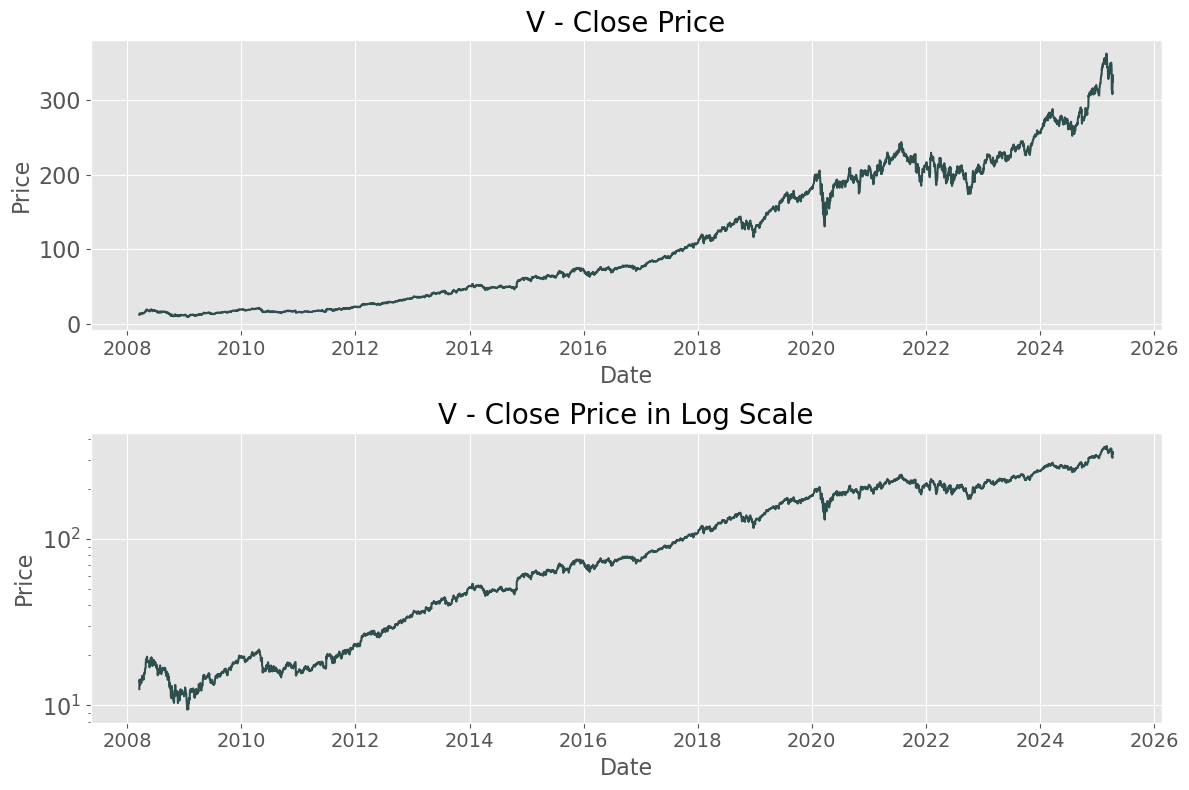

In [5]:
import matplotlib.pyplot as plt
from finance import historical_price

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

historical_price(ticker, start="2007", column="Close", scale='linear', ax=axes[0])
historical_price(ticker, start="2007", column="Close", scale='log', ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()


## Dividends

> *"Do you know the only thing that gives me pleasure? It's to see my dividends coming in."*  
> 
> *John D. Rockefeller, 1901*

In [6]:
from finance import annual_dividends

df_dividends = annual_dividends(facts)
df_dividends[0].tail(5)

,date,dividends,year
13,2020-09-30,2664000000,2020
14,2021-09-30,2798000000,2021
15,2022-09-30,3203000000,2022
16,2023-09-30,3751000000,2023
17,2024-09-30,4217000000,2024


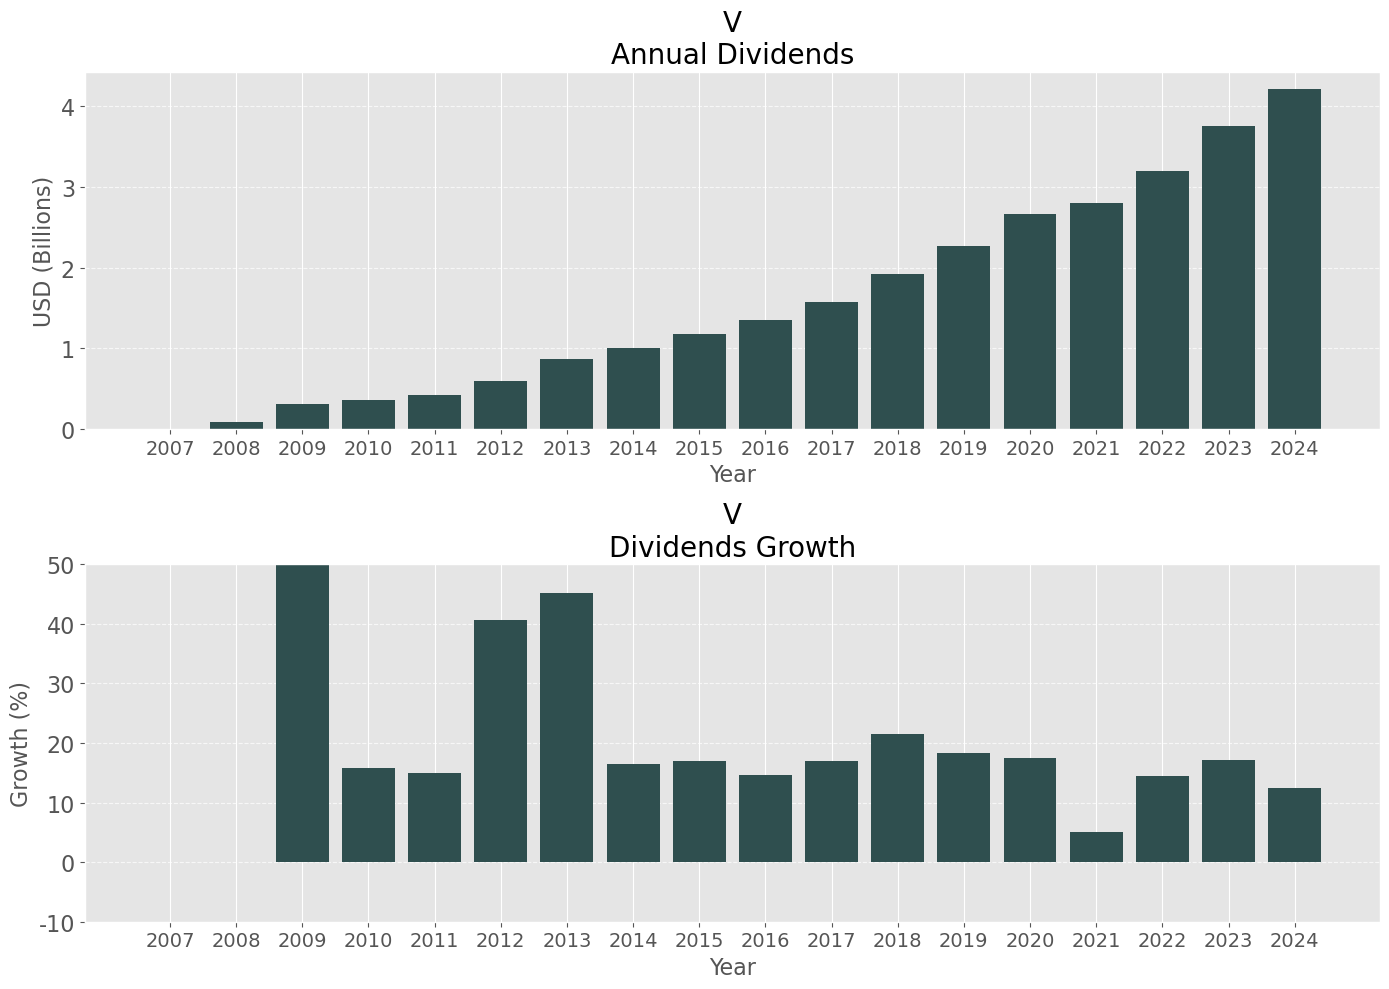

In [7]:
from finance import plot_annual_dividends, plot_dividends_growth

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_dividends(df_dividends[0], ticker=ticker, unit='B', ax=axes[0])
plot_dividends_growth(df_dividends[0], ticker=ticker, ymin=-10, ymax=50, ystep=10, ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

## P/E Ratio

[*********************100%***********************]  1 of 1 completed


Text(0.5, 0, 'Date')

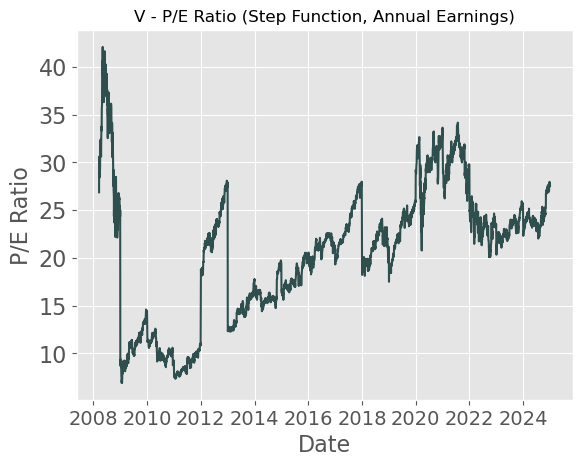

In [ ]:
import yfinance as yf

price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share

df = df_net_income[0].copy()
df = df[df['year'] >= market_cap.index.min().year]

# Daily P/E Ratio using step function for annual income
step_dates = pd.to_datetime(df['date'])
step_income = df.set_index('date')['net_income']

# Create step series aligned with price_df
pe_df = market_cap.copy()
pe_df['year'] = pe_df.index.year
pe_df['net_income'] = pe_df['year'].map(df.set_index('year')['net_income'])
pe_df['pe'] = pe_df[ticker] / pe_df['net_income']

plt.plot(pe_df.index, pe_df['pe'], color='darkslategray')
plt.title(f'{ticker} - P/E Ratio (Step Function, Annual Earnings)', fontsize=12)
plt.ylabel('P/E Ratio')
plt.xlabel('Date')
plt.show()